In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

# Parameters
image_train = 4
person_count = 6
image_count = person_count*image_train

# Load images
X = np.zeros((image_count, 112*92))
for i in range(person_count):
    for j in range(image_train):
        image = cv.imread(f'images/s{i+1}/{j+1}.pgm', cv.IMREAD_GRAYSCALE)
        image_arr = np.resize(image, (112*92))

        X[image_train*i+j] = image_arr

# Calculate mean_face and X_c
mean_face = np.mean(X, axis=0)
for i in range(image_count):
    X[i] -= mean_face

In [2]:
# Transpose to get the correct dimensions for U and Vh
U, S, Vh = np.linalg.svd(X.transpose())

In [3]:
# Helper function to get U_k of different ks
def get_U_k(k):
    U_k = U.copy()
    U_k[:, k:] = 0
    return U_k

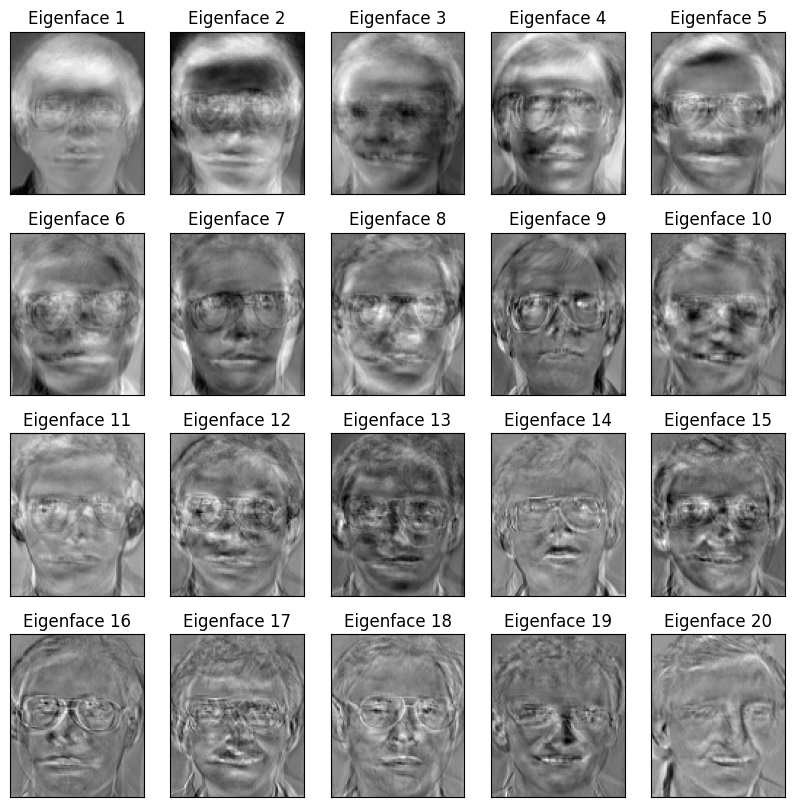

In [22]:
# Plot eigenfaces
U_20 = get_U_k(20)

fig, axs = plt.subplots(4, 5, figsize=(10, 10))

for i in range(4):
    for j in range(5):
        axs[i, j].imshow(U_20.transpose()[5*i+j].reshape((112, 92)), cmap='gray')
        axs[i, j].title.set_text(f"Eigenface {5*i+j + 1}")
        axs[i, j].set_xticks([])
        axs[i, j].set_xticklabels('')
        axs[i, j].set_yticks([])
        axs[i, j].set_yticklabels('')
plt.show()

In [109]:
# Loop over 2 different ks
for k in [10, 20]:
    U_k = get_U_k(k)

    # Loop over every test image
    print(f'k={k}')
    for i in range(6):
        for j in range(4, 8):
            # Get coordinate of test image in eigenspace
            test_image = cv.imread(f'images/s{i+1}/{j+1}.pgm', cv.IMREAD_GRAYSCALE)
            test_image_arr = np.resize(test_image, (112*92))
            test_image_coord = U_k[:, :k].transpose().dot(test_image_arr - mean_face) # Much faster to ignore 0 columns and directly use the dot function

            # Find best fit by using nearest neighbour
            best_idx = -1
            best_fit = np.inf
            for p in range(image_count):
                # Get the image coordinate for each training image
                image_arr = X[p]
                image_coord = U_k[:, :k].transpose().dot(image_arr)

                # Get the Euclidean distance
                fit = np.linalg.norm(image_coord - test_image_coord)

                # Update the best one
                if fit < best_fit:
                    best_idx = p
                    best_fit = fit

            # Result
            print(f"Image is from s{int(best_idx/image_train)+1} (True: {i+1})")
    print()

k=10
Image is from s1 (True: 1)
Image is from s1 (True: 1)
Image is from s1 (True: 1)
Image is from s1 (True: 1)
Image is from s2 (True: 2)
Image is from s2 (True: 2)
Image is from s2 (True: 2)
Image is from s2 (True: 2)
Image is from s3 (True: 3)
Image is from s3 (True: 3)
Image is from s3 (True: 3)
Image is from s3 (True: 3)
Image is from s4 (True: 4)
Image is from s4 (True: 4)
Image is from s4 (True: 4)
Image is from s4 (True: 4)
Image is from s5 (True: 5)
Image is from s5 (True: 5)
Image is from s5 (True: 5)
Image is from s5 (True: 5)
Image is from s6 (True: 6)
Image is from s6 (True: 6)
Image is from s6 (True: 6)
Image is from s6 (True: 6)

k=20
Image is from s1 (True: 1)
Image is from s1 (True: 1)
Image is from s1 (True: 1)
Image is from s1 (True: 1)
Image is from s2 (True: 2)
Image is from s2 (True: 2)
Image is from s2 (True: 2)
Image is from s2 (True: 2)
Image is from s3 (True: 3)
Image is from s3 (True: 3)
Image is from s3 (True: 3)
Image is from s3 (True: 3)
Image is from s4 

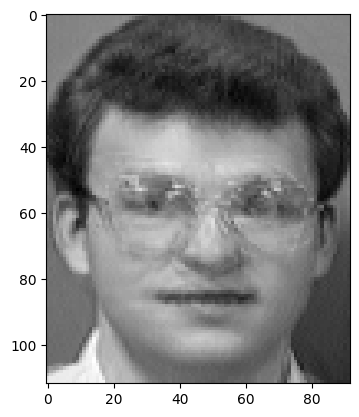

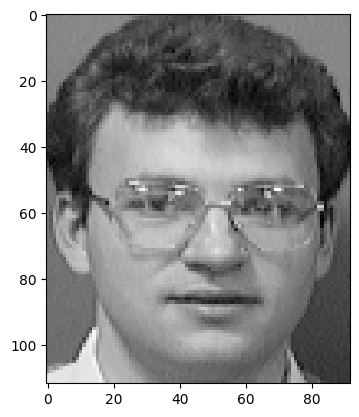

In [124]:
# Get U_10
U_10 = get_U_k(15)

# Get coordinate of training image in eigenspace
x = U_10[:, :15].dot(U_10[:, :15].transpose().dot(X[20])) + mean_face

# Show result
plt.imshow(x.reshape((112, 92)), cmap='gray')
plt.show()

plt.imshow((X[20] + mean_face).reshape((112, 92)), cmap='gray')
plt.show()